# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

*Описание данных*

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Осуществим импорт необходимых библиотек, и познакомимся с данными с помощью методов info(),head(),describe().

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment=None
import math

In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрим в процентах и  на графике соотношение заполненных и пропущенных значений в каждом столбце.

In [6]:
gaps_in_the_data = pd.DataFrame({'percent_of_nulls':data.isnull().sum()/len(data)*100})
print(gaps_in_the_data)

                      percent_of_nulls
total_images                  0.000000
last_price                    0.000000
total_area                    0.000000
first_day_exposition          0.000000
rooms                         0.000000
ceiling_height               38.799105
floors_total                  0.362885
living_area                   8.029875
floor                         0.000000
is_apartment                 88.290645
studio                        0.000000
open_plan                     0.000000
kitchen_area                  9.612220
balcony                      48.605426
locality_name                 0.206760
airports_nearest             23.384953
cityCenters_nearest          23.287902
parks_around3000             23.283683
parks_nearest                65.909954
ponds_around3000             23.283683
ponds_nearest                61.559559
days_exposition              13.422507


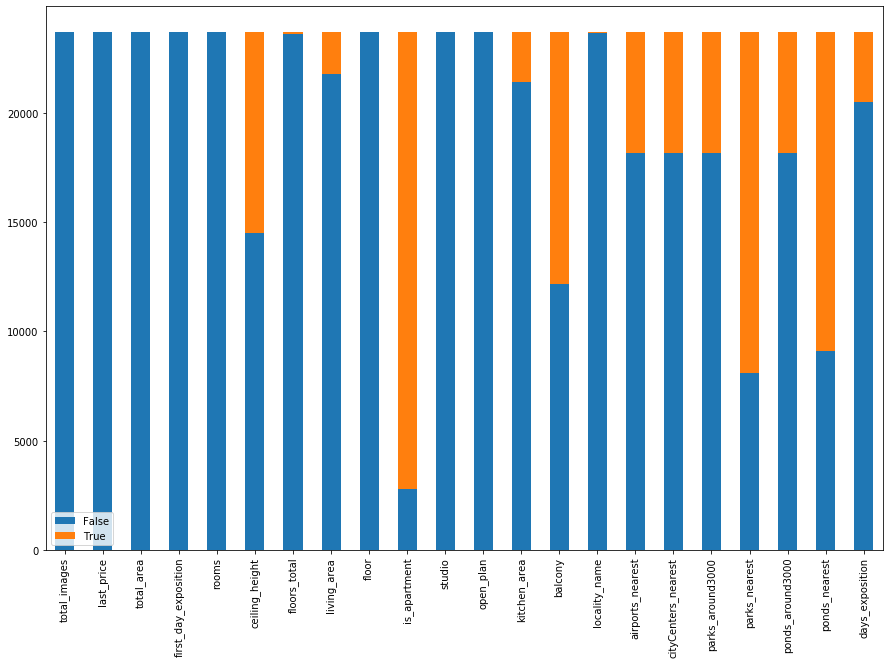

In [7]:
data.isna().apply(pd.Series.value_counts).transpose().plot(kind = 'bar', stacked = True, figsize = (15,10))
plt.legend(loc='lower left')

### Вывод

Для удобства восприятия можно переименовать некоторые столбцы, такие как 'cityCenters_nearest', ponds_around3000,'parks_around3000'

Рассмотрим, что нужно сделать в каждом из столбцов.
* 'last_price' - тип данных float -нужно заменить на int для удобства дальнейшей работы с данными
* 'total area' - тип данных float -нужно заменить на int для удобства дальнейшей работы с данными
* 'first_day_exposition' - тип данных object - нужно изменить на тип данных datetime
* 'rooms' - количество комнат указано от 1 до 19, возможно это ошибка
* 'ceiling_height' - в столбце много пропущенных данных, необходимо будет заполнить их, также есть потолки высотой 100 метров, что маловероятно
* 'is_apartment' - в столбце много пропущенных данных, также необходимо привести данные к булеву типу 
* 'living_area' - есть пропущенные значения в столбце
* 'kitchen_area' - есть пропущенные значения в столбце
* 'balcony' - практически половина значений в столбце не заполнена
* 'locality_name' - небольшое количество пропущенных значений в столбце
* 'airports_nearest' - есть пропущенные значения  
* 'cityCenters_nearest' - есть пропущенные значения 
* 'parks_around3000' - есть пропущенные значения
* 'parks_nearest' - есть пропущенные значения в столбце
* 'ponds_around3000' - есть пропущенные значения
* 'ponds_nearest' - нулевые значения
* 'days_exposition' - в столбце есть некоторое количество пропущенных данных, также необходимо заменить тип данных float на int


### Шаг 2. Предобработка данных

Проведем переименование столбцов

In [8]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'ponds_around3000': 'ponds_around_3000','parks_around3000': 'parks_around_3000'}, inplace=True)

In [9]:
#проверим результат переименования
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Проведем преобразование типа данных

In [10]:
#Преобразуем тип данных для столбцов 'last_price', 'total_area'
data[['last_price', 'total_area']] = data[['last_price', 'total_area']].astype('int')

# Преобразуем тип данных в столбце 'first_day_exposition' в тип datetime, заполним пропуски. 
#Добавим столбцы с днем, месяцем и годом подачи обЬявления
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['day_exp'] = data['first_day_exposition'].dt.weekday
data['month_exp'] = data['first_day_exposition'].dt.month                        
data['year_exp'] = data['first_day_exposition'].dt.year  


#Преобразуем тип данных в столбцах 'is_apartment' к булеву типу
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('bool')


#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')


#Посмотрим на результат преобразований
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

Рассмотрим детально каждый столбец, заполним пропуски

In [11]:
data.isnull().sum().sort_values()

total_images                0
day_exp                     0
days_exposition             0
month_exp                   0
open_plan                   0
studio                      0
is_apartment                0
floor                       0
year_exp                    0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
parks_around_3000        5518
ponds_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
dtype: int64

Столбец 'locality_name' - важен для дальнейшего анализа, пропущенных значений в данном столбце немного - всего 49,их лучше просто удалить, при объеме выборки удаление этих строк не повлияет на результат анализа. Также посмотрим на количество уникальных географических названий.

In [12]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [13]:
len(data['locality_name'].unique())

364

364 населенных пункта. Выведем список значений и посмотрим, можно ли его оптимизировать и категоризировать.


In [14]:
data['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

Есть явные дубликаты,такие как "поселок Мурино", "Мурино", "посёлок Мурино". Приведем названия к одному регистру и удалим типы населенных пунктов. в результате список должен значительно сократиться.

In [15]:
data['locality_name'] = data['locality_name'].str.lower()
len(data['locality_name'].unique())

364

In [16]:
drop_types = [' ','деревня', 'поселок','городского', 'городской', 'посёлок', 'типа', 'коттеджный', 'деревня', 'садовое', 'некоммерческое', 'товарищество', 'село','при','железнодорожной', 'станции' ]
for element in drop_types:
    data['locality_name'].replace(element,'',inplace=True, regex= True)

#Проверяем, сколько строк осталось
len(data['locality_name'].unique())


305

Список населенных пунктов сократился с 364 до 305 значений, очень неплохо.

Следующий столбец 'floors_total'. Пропущено 86 значений. Можем заполнить этажность медианой по населенному пункту

In [17]:
med_floors_total = data.groupby('locality_name')['floors_total'].median()
#print(med_floors_total['агалатово']) 
for locality in med_floors_total.index:
    data.loc[(data['locality_name'] == locality) & (data['floors_total'].isna()), 'floors_total'] = data.loc[(data['locality_name'] == locality) & (data['floors_total'].isna()), 'floors_total'].fillna(med_floors_total[locality])
#проверим, не осталось ли пропущенных значений
data['floors_total'].isna().sum()

#переведем данные в целочисленный тип, этажность зданий не может быть выражена дробным числом
data[['floors_total']] = data[['floors_total']].astype('int')

Посмотрим на данные о площади жилья. У нас есть данные  о площади квартир в квадратных метрах (м²) - total_area, где нет пропусков, и есть данные по жилой площади в квадратных метрах(м²) и  по площади кухни в квадратных метрах(м²) - living area и kitchen_area, где много пропусков
Заполним эти пропуски с помощью средней в зависимости от общей площади жилья

In [18]:
#вычисляем средние значения для кухонной площади и для жилой площади
mean_living_area = data.groupby('total_area')['living_area'].mean()
mean_kitchen_area = data.groupby('total_area')['kitchen_area'].mean()
#для заполнения значений там, в уникальных строках,где  нет данных ни по жилой площади, ни по прощади кухни,
#воспользуемся соотношением уже вычисленных средних
ratio = (mean_kitchen_area/mean_living_area).mean()

# Определяем функцию, устанавливающую значение площади по соответствующей средней,
# если значение площади пропущено
def fill_area(row):
    if math.isnan(row['living_area']) and not math.isnan(mean_living_area[row['total_area']]):        
        row['living_area'] = mean_living_area[row['total_area']]
    if math.isnan(row['kitchen_area']) and not math.isnan(mean_kitchen_area[row['total_area']]):        
        row['kitchen_area'] = mean_kitchen_area[row['total_area']]
    if math.isnan(row['living_area']) and not math.isnan(row['kitchen_area']):        
        row['living_area'] = row['total_area']-row['kitchen_area']
    if math.isnan(row['kitchen_area']) and not math.isnan(row['living_area']):        
        row['kitchen_area'] = row['total_area']-row['living_area']        
    if math.isnan(row['kitchen_area']) and math.isnan(row['living_area']):  
        row['living_area']= row['total_area']/(1+ratio);
        row['kitchen_area'] = row['total_area'] - row['living_area'];
    if  row['total_area'] - row['living_area'] - row['kitchen_area'] < 0:
        row['kitchen_area'] = row['total_area'] - row['living_area'];
    return row
# Применяем к каждой строке функцию fill_area
data = data.apply(fill_area, axis=1)


#проверяем, что пропусков не осталось
print(data['kitchen_area'].isna().sum())   
print(data['living_area'].isna().sum()) 


0
0


Рассмотрим данные о расстоянии до центра города, расстоянию до аэропорта, водоемах и парках. В этих столбцах много пропущенных данных, мы оставим их как есть, без заполнения пропусков.

In [19]:
print(data['airports_nearest'].isna().sum())
print(data['city_centers_nearest'].isna().sum())
print(data['parks_around_3000'].isna().sum())
print(data['parks_nearest'].isna().sum())
print(data['ponds_around_3000'].isna().sum())

5534
5511
5510
15586
5510


Рассмотрим данные о потолках и балконах


Скорее всего, что где пропущены значения, балконы просто отсутствуют, и люди не сочли нужным заполнять эту строку. 


In [20]:
#заменим пропуски в balcony на 0, после замены изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

Высоту потолков тоже многие не указали, заполним пропущенные значения медианой, для большей точности рассчитаем медианы по расположению жилья

In [21]:
# В столбце высота потолков пропущено большое количество данных. 
# Мы знаем, что в этом столбце диапазон значений от 0 до 100 метров. 

#Воспользуемся методом .describe
data['ceiling_height'].describe()

#Мы видим, что выбросы не сильно влияют на среднюю высоту потолков

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [22]:
ceiling_med = data.groupby(['locality_name'])['ceiling_height'].median()

for locality in ceiling_med.index:
    
    data.loc[(data['locality_name'] == locality) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[(data['locality_name'] == locality) & (data['ceiling_height'].isna()), 'ceiling_height'].fillna(ceiling_med[locality])
#проверим, не осталось ли пропущенных значений

print(data['ceiling_height'].isna().sum())


95


Осталось 95 пропусков, а было 9195- очень неплохой результат. Данные не получилось заполнить там, где расположение жилья уникально и нет возможности рассчитать по нему медиану. 

#### Просмотрели все столбцы, осуществили замену типа данных и заполнили пропуски, там , где было необходимо

### Шаг 3. Посчитайте и добавьте в таблицу

   * цену квадратного метра;
   * день недели, месяц и год публикации объявления;
   * этаж квартиры; варианты — первый, последний, другой;
   * соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [23]:
#Вычисляем цену квадратного метра и приводим его к типу int
data['price_per_m2'] = data['last_price']/data['total_area']
data['price_per_m2'] = data['price_per_m2'].astype('int')

#день недели, месяц и год публикации объявления мы вычислили при первичной обработке данных,
# и добавили в датафрейм дополнительные столбцы

#проводим категоризацию по этажам квартиры
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    

data['floor_cat'] = data.apply(floor_cat, axis = 1)



#рассчитаем соотношение жилой и общей площади
data['useful_area_ratio'] = data['living_area'] / data['total_area']

#рассчитаем соотношение площади кухни и общей площади
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area'] 


#выведем выборку строк, для проверки результата
data.sample(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,day_exp,month_exp,year_exp,price_per_m2,floor_cat,useful_area_ratio,kitchen_area_ratio
4571,9,5320000,50,2014-12-09,2,2.70,9,30.40,4,False,False,False,9.00,0,санкт-петербург,13404.0,15995.0,0.0,NaN,1.0,789.0,561,1,12,2014,106400,другой,0.608000,0.180000
18595,7,3785000,39,2015-11-02,1,2.80,18,20.00,7,False,False,False,9.00,2,санкт-петербург,31844.0,7982.0,0.0,NaN,1.0,878.0,438,0,11,2015,97051,другой,0.512821,0.230769
18720,8,4050000,38,2016-07-04,1,2.55,26,15.00,23,False,False,False,14.00,1,парголово,52768.0,17994.0,0.0,NaN,0.0,NaN,431,0,7,2016,106578,другой,0.394737,0.368421
23237,8,2100000,47,2019-01-26,2,2.56,12,27.50,12,False,False,False,7.20,1,ладожский,NaN,NaN,NaN,NaN,NaN,NaN,96,5,1,2019,44680,последний,0.585106,0.153191
18269,8,10500000,107,2017-09-27,3,2.75,18,63.20,13,False,False,False,18.00,2,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,79,2,9,2017,98130,другой,0.590654,0.168224
15042,2,3500000,49,2016-04-13,2,2.60,5,32.50,5,False,False,False,6.00,0,красное,38222.0,41646.0,0.0,NaN,0.0,NaN,378,2,4,2016,71428,последний,0.663265,0.122449
15780,9,12990000,119,2017-03-13,3,3.00,5,36.40,4,False,False,False,64.00,4,пушкин,18616.0,30770.0,1.0,569.0,0.0,NaN,0,0,3,2017,109159,другой,0.305882,0.537815
14558,17,5200000,54,2017-06-03,2,2.55,7,30.00,6,False,False,False,8.20,0,санкт-петербург,27726.0,9632.0,0.0,NaN,2.0,104.0,84,5,6,2017,96296,другой,0.555556,0.151852
3676,12,28789000,441,2019-01-23,4,2.70,6,405.95,6,False,False,False,35.05,0,санкт-петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,0,2,1,2019,65281,последний,0.920522,0.079478
9569,4,5000000,63,2019-03-21,3,2.83,5,49.70,2,False,False,False,7.40,1,санкт-петербург,16839.0,21147.0,0.0,NaN,1.0,1063.0,0,3,3,2019,79365,другой,0.788889,0.117460


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

   1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
   1. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
   1. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
   1. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
   1. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
   1. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
   1. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

 * ### Изучение площади,цены,числа комнат, высоты потолков. Построение гистограмм для каждого параметра.

In [24]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#приведем отображение столбца 'last_price' к привычному виду

,total_area,last_price,rooms,ceiling_height
count,23650.000000,23650.000000,23650.000000,23555.000000
mean,60.100930,6541126.897928,2.070106,2.732319
std,35.673519,10896399.175038,1.078620,1.004629
min,12.000000,12190.000000,0.000000,1.000000
25%,40.000000,3400000.000000,1.000000,2.550000
50%,52.000000,4650000.000000,2.000000,2.700000
75%,69.000000,6799000.000000,3.000000,2.700000
max,900.000000,763000000.000000,19.000000,100.000000


Применяем метод .describe, чтобы увидеть диапазоны значений и выбросы по интересующим нас столбцам. 
   * по общей площади диапазон значений от 12 кв.м. до 900 кв.м. Для гистограммы возьмем диапазон от 10 до 200 кв.м, судя по средней и по квантилям, большинство квартир имеет площадь менее 100 метров
   * по цене за квартиру - есть варианты и за 12 тысяч рублей и за 763 миллиона; для гистограммы ограничимся стоимостью квартир - 10 миллионов
   * по числу комнат - от 0 (возможно это студии) до 19(возможно мини-гостиницы, нежилые помещения, большие особняки,для гистограммы возьмем весь диапазон
   * по высоте потолков - от 1 до 100 метров. Для гистограммы ограничимся реалистичным диапазоном от 2 до 6 метров

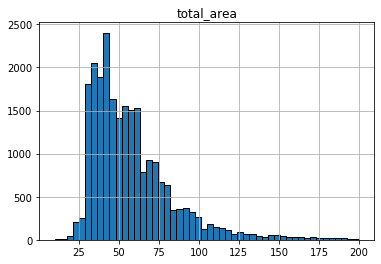

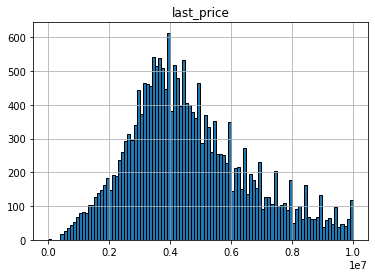

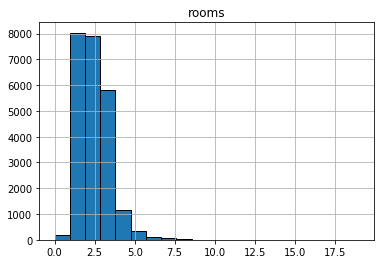

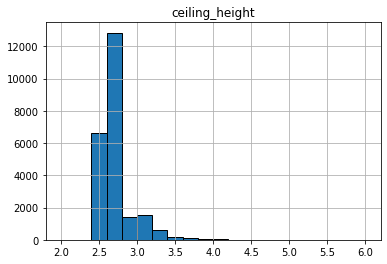

In [25]:
#построим гистограммы по интересующим нас столбцам
dict_for_hist = {
    'total_area' : [50, (10, 200)],
    'last_price' : [100, (100, 10000000)],
    'rooms' : [20, (0, 19) ],
    'ceiling_height' : [20, (2,6)]
}
 
for column in dict_for_hist.keys():
    data[column].hist(bins = dict_for_hist[column][0], range = dict_for_hist[column][1], ec = 'black')
    plt.title(column)
    plt.show()



    - Гистограмма 'total_area'.Большая часть квартир имеет метраж от 30 до 69 кв.м., средняя площадь квартир - 62 метра. Есть очень большие объекты недвижимости, но это - единичные случаи.  
    - Гистограмма 'last price'. Большая часть квартир продается за цену в промежутке между 3 и 6 млн, средняя стоимость квартир - около 7 млн    
    - Гистограмма 'rooms' : большая часть квартир в продаже имеют 1 или 2 комнаты, чуть меньше 3 комнатных квартир, также есть небольшое количество 4 комнатных и небольшое количество - 4. Есть и квартиры с большим количеством комнат, но их уже относительно немного.    
     - Гистограмма 'ceiling_height: квартиры, в большинстве своем, имеют потолки от 2,5-2,7 м до 3,5м. остальных вариантов относительно немного.



### Изучение времени продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 


In [26]:
data['days_exposition'].describe()

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [27]:
#также можно вывести среднюю и медиану с помощью формул
print('Среднее время продажи квартиры, дней', data['days_exposition'].mean().round())
print('Медианное время продажи квартиры, дней', data['days_exposition'].median())

Среднее время продажи квартиры, дней 156.0
Медианное время продажи квартиры, дней 73.0


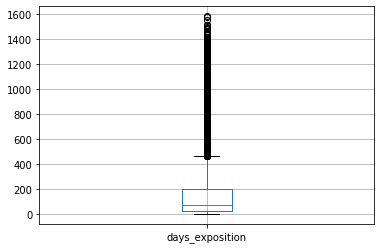

In [28]:
# построим диаграмму размаха
data.boxplot(column='days_exposition')

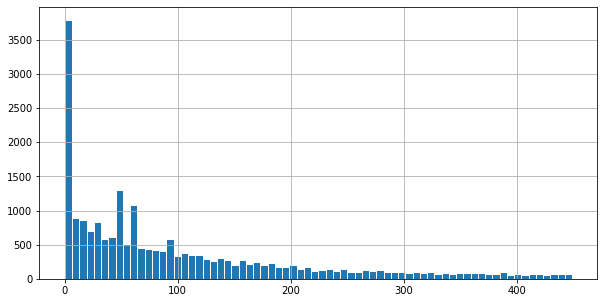

In [29]:
#ограничим срок продажи 450 днями
data.query('days_exposition<450')['days_exposition'].hist(bins=70, figsize=(10,5), ec= 'white')

Чаще всего квартиры продаются за первые два-три месяца с момента публикации объявления. Но некоторые квартиры продаются годами. Также присутствуют всплески продаж через некоторые промежутки времени, пик продаж при этом приходится на первую неделю размещения.

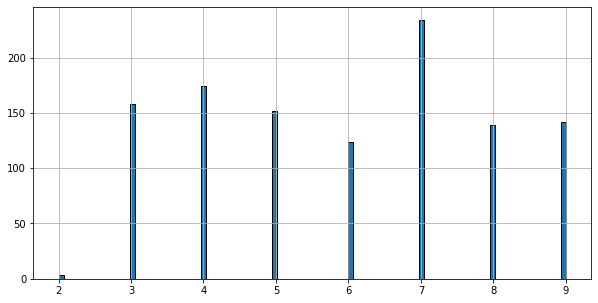

In [30]:
# рассмотрим детально эти аномалии - выведем первые 10 дней публикации объявления
data.query('1<days_exposition<10')['days_exposition'].hist(bins=100, figsize=(10,5), ec='black')

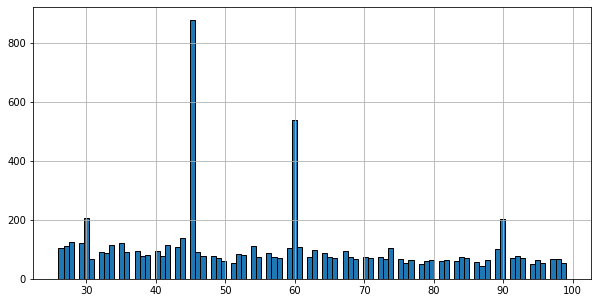

In [31]:
# посмотрим, что происходит с объявлениями на промежутке от 25 до 100 дней
data.query('25<days_exposition<100')['days_exposition'].hist(bins=100, figsize=(10,5), ec='black')

Явно есть некая кратность в сроках продажи квартир, есть рост на 7 день, затем видны интервалы в 15 дней, и 30 дней. Можно предположить, что на самом деле это не реальные сроки продажи, а автоматичиское снятие объявления с публикации, если оно не было продлено.

### Исследуем редкие и выбивающиеся значения.

count    18408.000000
mean       195.677694
std        226.832240
min          1.000000
25%         44.000000
50%        114.000000
75%        258.250000
max       1580.000000
Name: days_exposition, dtype: float64

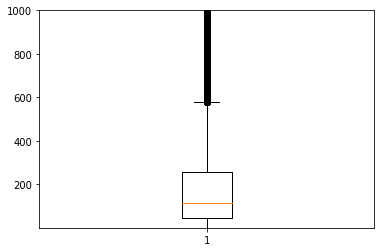

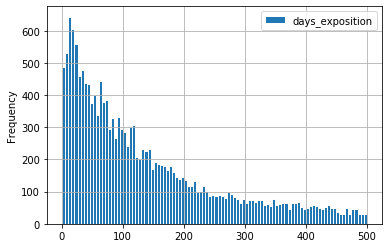

In [32]:
#очищаем данные от аномалий и создаем новый датафрейм good_data
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

# строим boxplot
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

#строим гистограмму
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,500), ec='white')

#изучаем очищенные данные с помощью .describe
good_data['days_exposition'].describe()

Если смотреть по датафрейму, очищенному от выбросов, то времени на продажу квартир уходит больше. Среднее время продажи составляет 195 дней, медиана - 114 дней, аномально долгий период продажи также увеличился, и приблизился к 600 дням. 1 квартильный период составляет 44 дня, этот срок можно считать временем быстрой продажи квартиры

### Какие факторы больше всего влияют на стоимость квартиры? 

#### Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [33]:
#для удобства построения графиков напишем функцию, которая определяет зависимость цены 
def depend_price_per_m2(data, column):
    plt.style.use('seaborn-pastel')
   
    if column == 'floor_cat' or column == 'city_centers_nearest' or column=='total_area':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'city_centers_nearest' or column == 'city_centers_nearest_km':
        fontsize = 12
    else:
        fontsize = 15
    data_filtered = data.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = data_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                            title=[column], legend=None, subplots=True,
                            fontsize=fontsize, figsize=(15,5))
    ax2 = plt.gca() 
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'city_centers_nearest':
        plt.xticks(rotation=0)
    return plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1f143a10>],
      dtype=object)

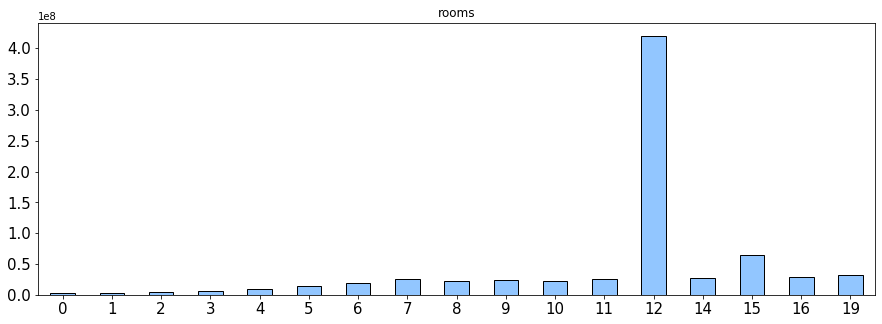

In [34]:
depend_price_per_m2(data, 'rooms')

Видим, что цена растет при увеличении количества комнат, но есть очевидный выброс. Определим его с помощью диаграммы размаха

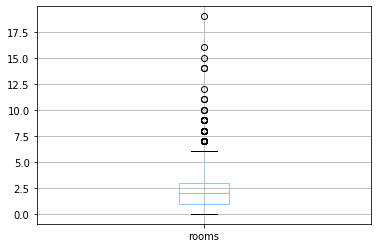

In [35]:
data.boxplot(column='rooms')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1efd6450>],
      dtype=object)

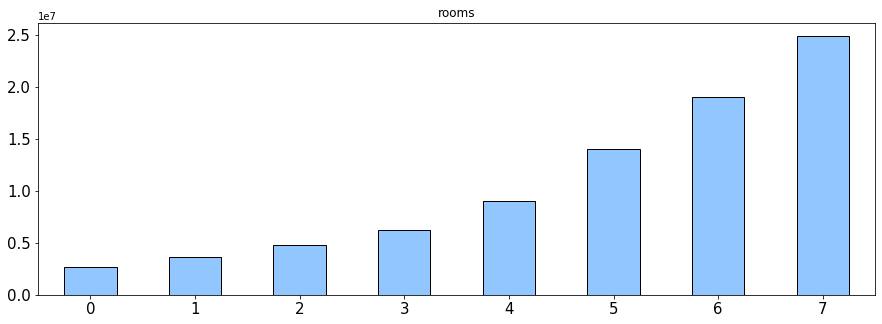

In [36]:
#очищаем данные, строим график
depend_price_per_m2(data.query('rooms <= 7'), 'rooms')

Чем больше количество комнат, тем выше стоимость, это справедливо вплоть до 7 комнат, далее начинаются выбросы.

Tеперь посмотрим, как влияет общая площадь на стоимость квартиры. Сразу выведем диаграмму размаха, чтобы определить выбросы(или можно посмотреть определение выбросов в данных по общей площади на предыдущем этапе анализа)

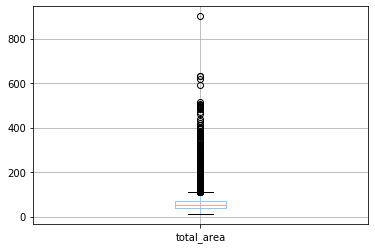

In [37]:
data.boxplot(column='total_area')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1f8e7e50>],
      dtype=object)

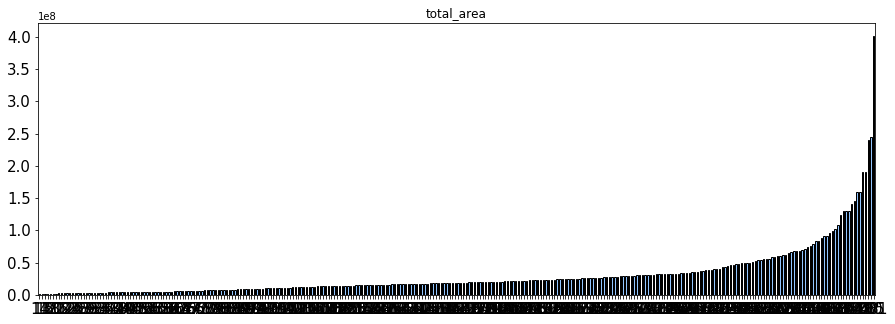

In [38]:
#Отсекаем выбросы, строим график
depend_price_per_m2(data.query('total_area <= 500'), 'total_area')

Цена незначительно увеличивается при увеличении площади, но  чем больше становится площадь объекта недвижимости, тем непредсказуемее рост цен

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1fc1c810>],
      dtype=object)

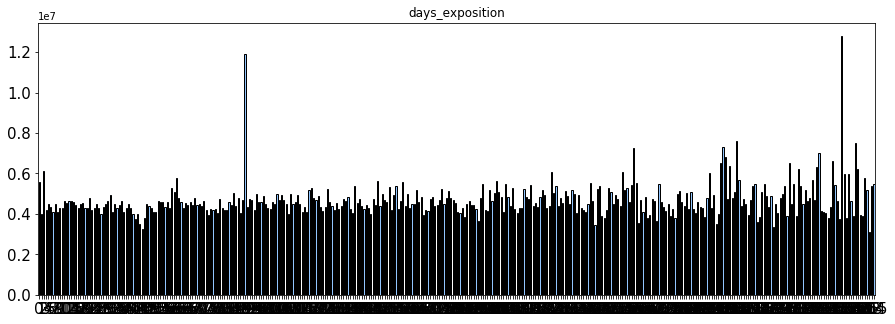

In [39]:
#посмотрим, зависит ли цена от срока продажи. Ограничим срез первым годом продажи
depend_price_per_m2(data.query('days_exposition <= 365'), 'days_exposition')

Видим, что срок продажи практически не влияет на цену, есть уникальные выбросы, но их общее количество невелико.

Посмотрим зависимость цены от категории этажей(первый, последний и другие)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1f039e50>],
      dtype=object)

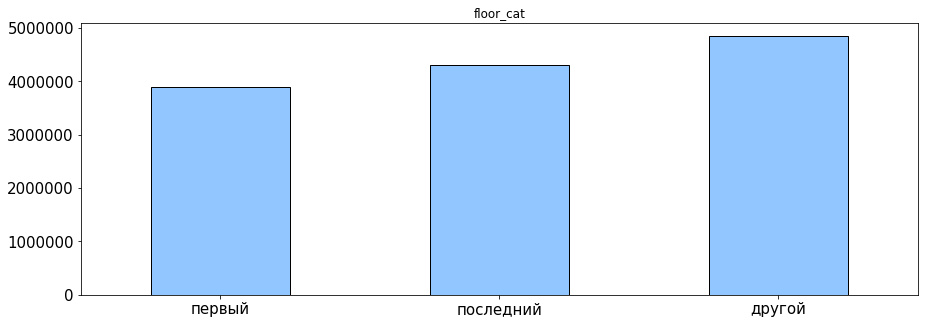

In [40]:
depend_price_per_m2(data, 'floor_cat')

Квартиры на первом этаже дешевле всего, квартиры на последнем этаже дороже, чем на первом. Квартиры на других этажах стоят заметно выше чем на первом, и выше, чем на последнем.

-0.3177572061374457

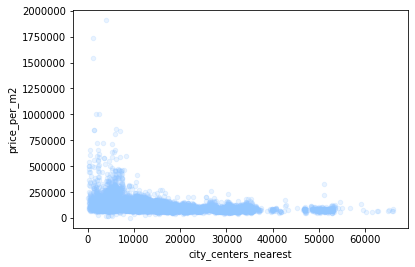

In [41]:
#посмотрим соотношение стоимости и расстояния от центра
data.plot(kind = 'scatter', y = 'price_per_m2', x = 'city_centers_nearest', alpha = 0.2)

data['city_centers_nearest'].corr(data['price_per_m2'])

Результат вполне предсказуем -чем ближе к центру - тем выше стоимость жилья

Посмотрим, зависит ли цена от дня/месяца/года размещения

,mean,count,median
day_exp,,,
3,100653.395474,4286,95555
1,100179.307784,4175,96103
2,100063.770550,3966,96052
0,99919.157515,3606,95257
5,99511.302121,1933,94117
4,99437.777555,3992,95000
6,98196.103428,1692,95000


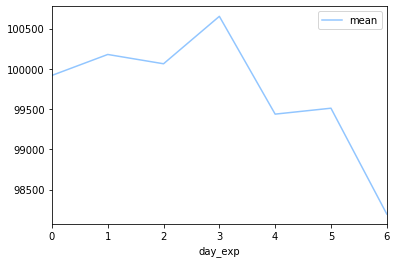

In [42]:
#Построим сводную таблицу и на ее основе создадим график зависимости цены от дня недели
pivot_table_wday_exp = data.pivot_table(index = 'day_exp', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_wday_exp.columns = ['mean', 'count', 'median']
pivot_table_wday_exp.plot(y = 'mean')

pivot_table_wday_exp.sort_values('mean', ascending = False)

Средняя стоимость квартир, выставленных на продажу в четверг выше, а дешевле всего средняя стоимость квартир, выставленных на продажу в воскресенье. 

,mean,count,median
month_exp,,,
4,102416.726085,2373,97014
8,100603.104478,1742,96708
9,100934.988883,1979,96333
11,99707.820870,2367,96153
1,100296.191818,1491,95961
7,100111.055621,1690,95640
3,99489.735476,2582,95588
2,99197.236832,2639,95454
12,99935.957265,1638,94654


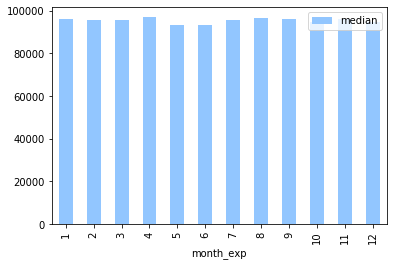

In [43]:
#сделаем сводную таблицу, чтобы построить график зависимости цены от месяца размещения
pivot_table_month_exp = data.pivot_table(index = 'month_exp', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exp.columns = ['mean', 'count', 'median']
pivot_table_month_exp.plot(y = 'median', kind= 'bar')

pivot_table_month_exp.sort_values('median', ascending = False)

Летом очевидно наблюдается снижение покупательской активности, и квартира выставленные на продажу в мае-июне ощутимо дешевле.

,mean,count,median
year_exp,,,
2014,124781.220588,136,107493.5
2019,107687.481417,2879,104081.0
2018,98306.210174,8512,96363.0
2015,105080.610401,1173,93548.0
2017,98041.114600,8185,93181.0
2016,98646.718264,2765,92200.0


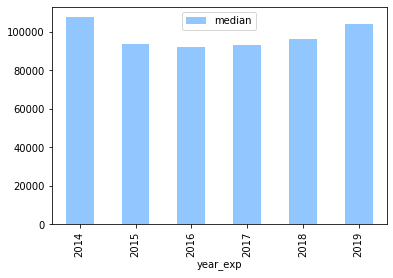

In [44]:
#сделаем сводную таблицу, и посмотрим, есть ли зависимость от года размещения
pivot_table_year_exp = data.pivot_table(index = 'year_exp', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exp.columns = ['mean', 'count', 'median']
pivot_table_year_exp.plot(y = 'median', kind='bar')

pivot_table_year_exp.sort_values('median', ascending = False)

В 2014 году стоимость квартир была сильно выше, чем в последующие 2015-1917 годы, в 2018 и 2019 году стоимость квартир начала расти, но к уровню 2014 года  цены еще не вернулись

####  Анализ 10 населённых пунктов с наибольшим числом объявлений. 

In [45]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table


,count,mean
locality_name,,
санкт-петербург,15721,115347.299472
мурино,590,86729.120339
кудрово,472,95878.889831
шушары,440,79068.186364
всеволожск,398,68984.801508
пушкин,369,103610.948509
колпино,338,75735.150888
парголово,327,90675.235474
гатчина,307,69045.068404


Вывели 10 пунктов с наибольшим количеством объявлений о продаже жилья. Дороже всего квартиры стоят в Санкт-ПетербургеВ Выборге средняя цена за квадратный метр почти в 2 раза ниже, чем в Санкт-Петербурге.

#### Выделим квартиры в Санкт-Петербурге ('locality_name') и посмотрим какая областьвходит в центр, и как цена зависит от удаленности от центра. 

In [46]:
#Делаем срез по квартирам в Санкт-Петербурге
spb = data.query('locality_name == "санкт-петербург"')
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000

data['city_centers_nearest_km'].describe()

count    18139.000000
mean        14.197861
std          8.606830
min          0.181000
25%          9.241000
50%         13.105000
75%         16.293000
max         65.968000
Name: city_centers_nearest_km, dtype: float64

Заполним пропуски и приведем столбец к целым числам. Пропуски будем заполнять числом близким к максимальному - чтобы заполнение отсутствующих значений не повлияло на наше исследование зависимости цены от близости к центру.

In [47]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].fillna(66)
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int')

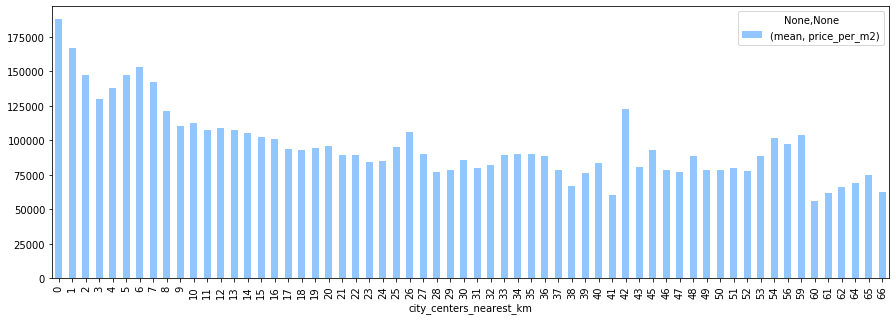

In [48]:
spb_central = data.pivot_table(index = 'city_centers_nearest_km', values = 'price_per_m2', aggfunc=['mean'])
spb_central.plot(kind='bar', figsize=(15,5))

Исходя из графика, дороже всего стоят квартиры в 8 км от центра.Соответственно в центральную зону входят все квартиры в радиусе 8 км от центра Cанкт-петербурга


#### Исследуем сегмент квартир в центре. Проанализируем следующие параметры: площадь, цена, число комнат, высота потолков. Посмотрим, какие факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Делаем срез по квартирам в центре Санкт-Петербурга

In [49]:
centre_spb = data.query('city_centers_nearest_km <= 8 and locality_name == "санкт-петербург"')

In [50]:
centre_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,day_exp,month_exp,year_exp,price_per_m2,floor_cat,useful_area_ratio,kitchen_area_ratio,city_centers_nearest_km
3,0,64900000,159,2015-07-24,3,2.70,14,89.8875,9,False,False,False,15.525,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,4,7,2015,408176,другой,0.565330,0.097642,6
4,2,10000000,100,2018-06-19,2,3.03,14,32.0000,13,False,False,False,41.000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,1,6,2018,100000,другой,0.320000,0.410000,8
24,8,6500000,97,2015-10-31,2,2.70,3,46.5000,1,False,False,False,19.600,0,санкт-петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265,5,10,2015,67010,первый,0.479381,0.202062,2
35,6,15500000,149,2017-06-26,5,2.70,5,104.0000,4,False,False,False,17.000,0,санкт-петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644,0,6,2017,104026,другой,0.697987,0.114094,3
51,7,45000000,161,2017-10-17,3,3.20,8,38.0000,4,False,False,False,50.000,0,санкт-петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541,1,10,2017,279503,другой,0.236025,0.310559,6


In [51]:
centre_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,total_area,last_price,rooms,ceiling_height
count,4382.000000,4382.000000,4382.000000,4382.000000
mean,88.348699,13768752.288681,2.720904,2.968444
std,57.947649,22961363.927002,1.410307,1.674960
min,12.000000,1600000.000000,0.000000,2.000000
25%,53.000000,6207104.000000,2.000000,2.700000
50%,75.000000,8707500.000000,3.000000,2.755000
75%,104.000000,13500000.000000,3.000000,3.100000
max,900.000000,763000000.000000,19.000000,100.000000


Применяем метод .describe, чтобы увидеть диапазоны значений и выбросы по интересующим нас столбцам. А затем построим графики по городу в целом и по центру, чтобы наглядно увидеть различия между ними


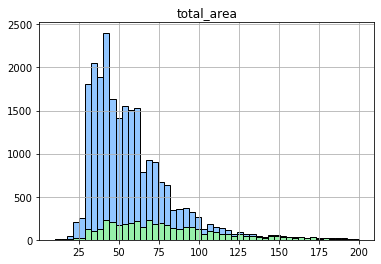

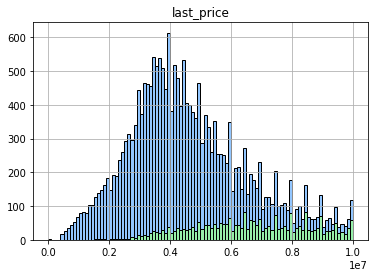

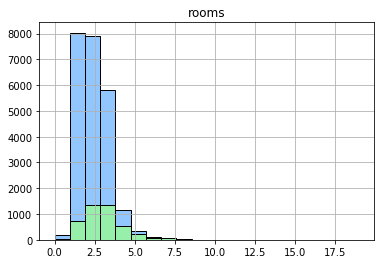

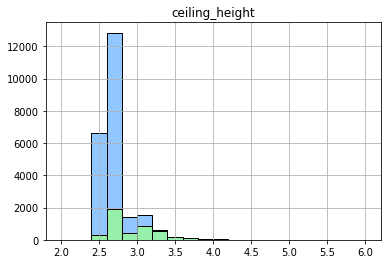

In [52]:
dict_for_hist = {
    'total_area' : [50, (10, 200)],
    'last_price' : [100, (100, 10000000)],
    'rooms' : [20, (0, 19) ],
    'ceiling_height' : [20, (2,6)]
}
 
for column in dict_for_hist.keys():
    data[column].hist(bins = dict_for_hist[column][0], range = dict_for_hist[column][1], ec = 'black')
    centre_spb[column].hist(bins = dict_for_hist[column][0], range = dict_for_hist[column][1], ec = 'black')
    plt.title(column)
    plt.show()

Очевидно, что в центре города площадь квартир больше,цены на жилье выше,больше предложений квартир с 3-4 комнатами,также видно, что в центре больше квартир с высокими потолками

Рассмотрим влияние на стоимость квартиры таких факторов как число комнат, этаж, удалённость от центра, дата размещения объявления). 

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.657197,0.372375,0.066112
total_area,0.657197,1.000000,0.758611,0.085852
rooms,0.372375,0.758611,1.000000,0.054440
ceiling_height,0.066112,0.085852,0.054440,1.000000


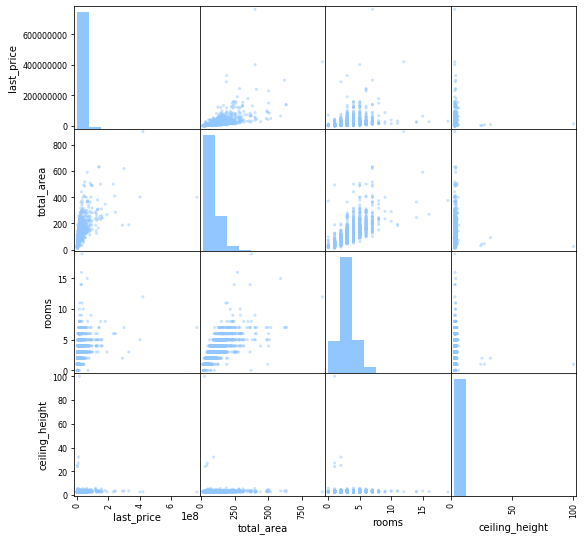

In [54]:
columns = ['last_price', 'total_area','rooms', 'ceiling_height']

 
dict_for_auto = [columns]
 
for columns in dict_for_auto:
    display(spb[columns].corr())
    pd.plotting.scatter_matrix(centre_spb[columns], figsize=(9, 9))
    plt.show()

Самый большой коэффициент корреляции между ценой и величиной общей площади, чем больше площадь, тем выше цена, также есть зависимость цены от количества комнат, но корреляция между ними меньше. От высоты потолков цена зависит очень незначительно.

Создадим функцию depend_price_m2_cenral, которая определяет зависимость цены за квадратный метр для центра Спб

In [55]:
def depend_price_m2_cenral(centre_spb, column):
    plt.style.use('seaborn-pastel')
   
    if column == 'floor_cat' or column == 'city_centers_nearest' or column=='total_area':
        sort_key = 'last_price'
    else:
        sort_key = column
    if column == 'city_centers_nearest' or column == 'city_centers_nearest_km':
        fontsize = 12
    else:
        fontsize = 15
    data_spb_filtered = centre_spb.groupby(column).median()['last_price'].reset_index().sort_values(by=sort_key)
    plot = data_spb_filtered.plot(x=column, y="last_price", kind='bar', ec='black', 
                            title=[column], legend=None, subplots=True,
                            fontsize=fontsize, figsize=(15,5))
    ax2 = plt.gca() 
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'city_centers_nearest':
        plt.xticks(rotation=0)
    return plot

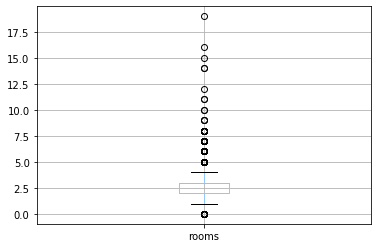

In [56]:
#построим диаграмму размаха для количества комнат
centre_spb.boxplot(column='rooms')

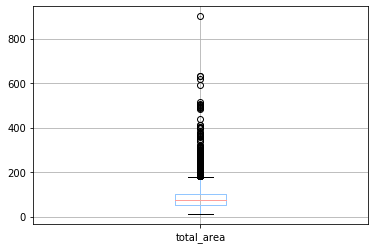

In [57]:
#построим диаграмму размаха для общей площади
centre_spb.boxplot(column='total_area')

Видим, что для центра Спб смещаются границы нормальных значений, для числа комнат выбросы начинаются уже при числе комнат выше 4, интерквартильный размах общей площади квартир в центре также иной, чем в целом по городу.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1e80d990>],
      dtype=object)

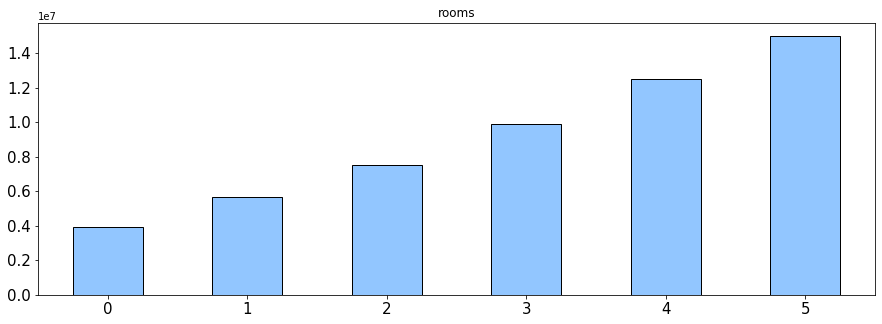

In [58]:
depend_price_m2_cenral(centre_spb.query('rooms <= 5'), 'rooms')

Чем больше комнат, тем больше стоимость жилья, это справедливо как для всего города, так и для его центра

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1e5b5350>],
      dtype=object)

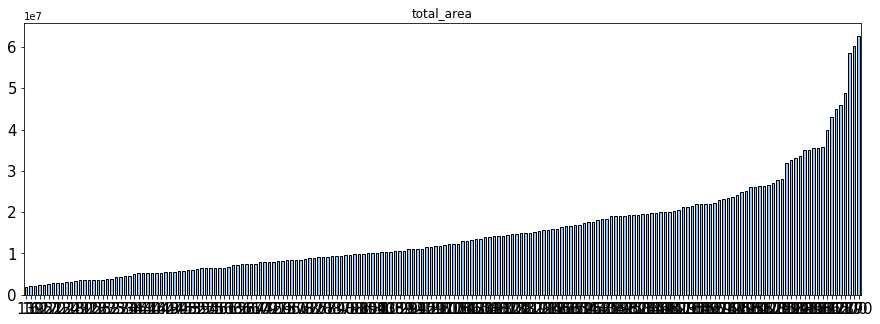

In [59]:
depend_price_m2_cenral(centre_spb.query('total_area <= 200'), 'total_area')

Аналогично с общей площадью, цем, больше площадь, тем выше цена, как в центре, так и во всем городе

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee20039c10>],
      dtype=object)

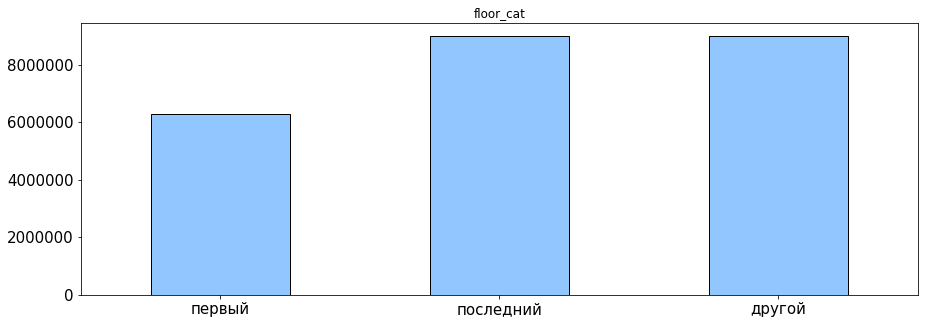

In [60]:
depend_price_m2_cenral(centre_spb, 'floor_cat')

В центре также дешевле всего первые этажи, а вот последний этаж стоит не меньше, чем другие этажи. Это отличается от города в целом, где последний этаж стоит дороже первого, но дешевле других.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1e71c910>],
      dtype=object)

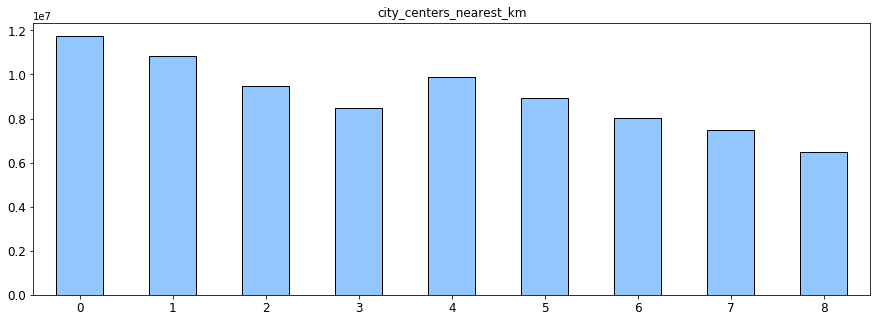

In [61]:
depend_price_m2_cenral(centre_spb, 'city_centers_nearest_km')

Видим, что в целом, чем ближе к центру, тем квартиры дороже, но видимо еще есть зависимость стоимость жилья не только от расстояния до цента, но и от других факторов, так квартиры в 4 и 5 км от центра стояд дороже, чем в 3км.

,mean,count,median
year_exp,,,
2014,179614.921053,38,142766.5
2019,153712.563786,486,133662.0
2018,137495.587973,1347,123529.0
2015,142690.065217,368,120471.5
2016,141990.081218,591,119767.0
2017,138937.887887,1552,119470.0


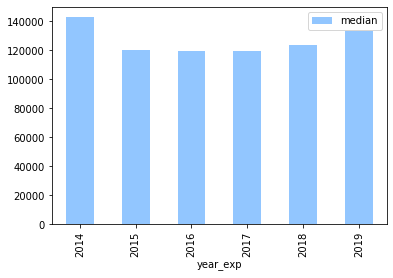

In [62]:
#посмотрим как квартиры в центре стоили в зависимости от года размещения
centre_spb_year_exp = centre_spb.pivot_table(index = 'year_exp', values = 'price_per_m2', aggfunc = ['mean', 'count', 'median'])
centre_spb_year_exp.columns = ['mean', 'count', 'median']
centre_spb_year_exp.plot(y = 'median', kind='bar')

centre_spb_year_exp.sort_values('median', ascending = False)

В 2014 году стоимость квартир была сильно выше, чем в последующие 2015-1917 годы, в 2018 и 2019 году стоимость квартир начала расти, но к уровню 2014 года цены еще не вернулись. Но средние цены на стоимость жилья в центре города  намного выше средних цен в целом по городу, это справедливо в любое время.


### Шаг 5. Общий вывод

После предобработки данных, заполнения пропусков, там, где было необходимо, и исследовательского анализа архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет , можно сделать определенные выводы о состоянии рынка недвижимости
 * Средняя стоимость жилья около 7 млн, при этом стоимость квартир в центре Санкт-Петербурга значительно выше, и составляет 13 миллионов рублей    
 * Стоимость квартир зависит от общей площади, от количества комнат, от старени удаленности от центра, этаж также имеет значение, квартиры на первом этаже стоят дешевле всего.
 * В летние месяцы квартиры, размещенные на сайте объявлений, стоят меньше, чем в остальное время года, также объявления, опубликованные в выходные имеют меньшую цену на квартиру, чем в будние дни
 * Средний срок продажи жилья составляет 195 дней, при этом если квартира продалась за первые 44 дня с момента публикации это можно считать очень быстрой продажей.
 * В 2014 году цены на жилье были значительно выше, затем в результате кризиса в экономике, стоимость недвижимости значительно снизилась и не отыграла это снижение вплоть до 2019 годаю В 2019 году наблюдается рост цен на жилье.
